## **1) Objetivo de la celda / experimento**

- 1.1 Objetivo corto: calcular la serie anual de la Intensidad de la Isla de Calor Urbana (UHI nocturna) para varios pares urbana–rural y evaluar su tendencia con tests no paramétricos robustos.
- 1.2 Pares analizados (automático en la celda):

0076_vs_0229I (Aeropuerto BCN vs estación rural 0229I) — ventana larga 1980–2016.

0200E_vs_0229I (Fabra vs 0229I) — ventana larga 1980–2016.

0076_ruralMedian (Aeropuerto vs mediana de estaciones rurales) — ventana reciente 2005–2025.

0200E_ruralMedian (Fabra vs mediana rural) — ventana reciente 2005–2025.

## **2) Resumen del procesamiento que ejecuta la celda**

(Esto es lo que hace exáctamente la celda, paso a paso — ideal para la metodología)

Carga del CSV: para cada par carga el archivo uhi_input_<pair>.csv desde data/processed/. Cada archivo tiene al menos fecha, tmin_urban, tmin_rural (o tmin_rural_median), velmedia_urban, weak_wind, y UHI_tmin (ya calculada como diferencia diaria).

Dos escenarios de agregación (se prueban ambos):

weak_min100: conserva solo días con weak_wind == True (viento débil) y exige >= 100 días válidos en el año para incluir ese año en la serie anual. Objetivo: medir UHI en condiciones nocturnas propicias a que la isla se forme (calma).

noweak_min150: no filtra por viento y exige >= 150 días válidos en el año. Objetivo: garantizar series anuales más completas y hacer análisis de contraste.

Resample anual: la celda agrega diariamente a anual usando resample("YE") para obtener la media anual de UHI_tmin y el conteo de días por año.

Filtrado por días mínimos: se mantienen solo los años con conteo >= min_days del escenario.

Análisis estadístico por año:

Si hay suficientes años (serie anual no vacía), se aplica:

Mann–Kendall (MK): test no paramétrico para detectar la presencia/ausencia de tendencia. Devuelve p-value y dirección.

Estimator Theil–Sen: estimador robusto de la pendiente (°C/año); se multiplica por 10 para presentar °C / década.

Si no hay años válidos, se anota como 0 años y no se ejecuta MK/Theil-Sen.

Resumen: la celda guarda un CSV uhi_trends_summary_scenarios.csv con una fila por par y escenario conteniendo file, scenario, years_count, period_start, period_end, MK_p, MK_trend, TheilSen_slope_degC_per_decade.

## **3) Por qué usamos MK + Theil–Sen (justificación metodológica)**

Mann–Kendall es el test estándar en climatología para tendencias porque no asume distribución normal y tolera outliers y gaps (siempre que la serie anual esté suficientemente poblada).

Theil–Sen estima la pendiente mediana entre todos los pares de puntos: robusto frente a outliers y más fiable que una regresión OLS en series climáticas.

Presentar significancia (p) y magnitud (°C/decada) es la práctica habitual y la interpretación más informativa.

## **4) Qué significan las columnas del CSV resultante**

file: identificador del par (ej. 0076_vs_0229I).

scenario: weak_min100 o noweak_min150.

years_count: número de años anuales válidos (según min_days y filtro).

period_start / period_end: primer y último año válido usados en la tendencia.

MK_p: p-value del test Mann–Kendall (dos colas).

MK_trend: texto: increasing, decreasing o no trend según p y signo de Z.

TheilSen_slope_degC_per_decade: pendiente robusta expresada en °C por década.

## **5) Interpretación práctica de los resultados que obtuviste**

Te doy un formato de lectura por fila (ya he preparado un texto resumido; aquí va con más detalle):

Ejemplo (fila real): 0076_vs_0229I,weak_min100,9,1980.0,1992.0,0.0025,decreasing,-2.94

years_count = 9: solo 9 años tuvieron ≥100 noches con weak_wind en la ventana 1980–2016 → muestra pequeña y sesgada en el tiempo.

MK_p = 0.0025 indica significancia, pero cuidado: con 9 años (especialmente si concentrados en inicio o fin) la inferencia es inestable; la dirección decreasing y la pendiente -2.94°C/decada es probablemente un artefacto (por ejemplo por selección de años) y no representativa del comportamiento real.

Conclusión: ignorar como evidencia climática sólida; tratar como indicación de inestabilidad del escenario con pocos años.

Ejemplo (fila real): 0076_ruralMedian,noweak_min150,21,2005.0,2025.0,0.0012,increasing,0.5826

years_count = 21 (2005–2025): serie razonable (21 años).

MK_p = 0.0012 → tendencia estadísticamente significativa.

slope = +0.5826 °C/decade → la UHI nocturna aumentó ≈ 0.58 °C por década en ese intervalo. Esto es una conclusión robusta para tu TFG (si son correctos los datos y el procesamiento).

Cálculo de UHI:
Se calculó la intensidad de la Isla de Calor Urbana nocturna (UHI_tmin) como la diferencia diaria entre la temperatura mínima registrada en la estación urbana y la temperatura mínima en la referencia rural: UHI_tmin = tmin_urban − tmin_rural. Para mejorar la robustez, la referencia rural se definió como la mediana diaria de las estaciones rurales disponibles (rural_median) y, cuando fue posible, se utilizó la estación rural individual 0229I para comparaciones históricas.

Agregación anual:
Las series diarias se agregaron a medias anuales usando la media de días válidos por año. Para garantizar representatividad, solo se consideraron años con un mínimo de días válidos (umbral `min_days`). Se evaluaron dos escenarios:
- `weak_min100`: solo noches con ventilación débil (`velmedia < 3 m/s`) y `min_days = 100`.
- `noweak_min150`: todas las noches (sin filtro de viento) con `min_days = 150`.

Test de tendencia:
Para detectar la existencia de tendencias se aplicó el test no paramétrico de Mann–Kendall (MK), y para estimar la magnitud de la tendencia se empleó el estimador robusto de Theil–Sen. Presentamos tanto la significancia estadística (p-value de MK) como la pendiente robusta en °C por década (Theil–Sen × 10).


0076 (Aeropuerto) vs 0229I (1980–2016):
- Escenario `weak_min100`: debido a la escasez de años válidos (n=9) el test arroja p=0.002 y una pendiente negativa grande (-2.94 °C/dec), sin embargo esta muestra es insuficiente y sesgada temporalmente, por lo que no se considera concluyente.
- Escenario `noweak_min150`: con n=35 años válidos no se detecta tendencia significativa (MK p=0.865), por lo que no hay evidencia de cambio de la UHI nocturna en 1980–2014 para este par.

0076 vs ruralMedian (2005–2025):
- Escenario `noweak_min150`: n=21 años válidos, MK p=0.0012 y Theil–Sen = +0.58 °C/dec. Interpretemos esto como evidencia robusta de intensificación de la UHI nocturna en las últimas dos décadas.

0200E (Fabra) — resultados análogos muestran ausencia de tendencia en 1980–2014 y aumento significativo en 2005–2025 con pendientes entre +0.28 y +0.40 °C/dec, según escenario.


Los resultados muestran una aparente estabilidad de la UHI nocturna en la ventana larga (1980–2014) y una intensificación significativa en el periodo moderno (2005–2025). Sin embargo, deben considerarse las siguientes limitaciones metodológicas:
- El filtrado por viento reduce drásticamente el número de noches válidas; por tanto los escenarios que usan `weak_wind` son más estrictos pero en algunos pares no alcanzan años representativos.
- La construcción de la referencia rural por mediana reduce la influencia de anomalías locales pero introduce heterogeneidad altitudinal que debe discutirse.
- Gaps de datos y periodos de disponibilidad diferentes entre estaciones condicionan el periodo efectivo de análisis y la potencia estadística.
- Se recomienda presentar ambos escenarios (con y sin filtro) y discutir la sensibilidad de la pendiente a esa elección.


In [1]:
# Celda: cálculo automático de tendencias en DOS escenarios (weak_wind y sin filtro)
import pandas as pd
import numpy as np
from pathlib import Path
import math
from itertools import combinations
from datetime import datetime
from scipy.stats import norm  # si no está instalado, la p-value usará fallback

BASE_DIR = Path.cwd().parent
PROC_DIR = BASE_DIR / "data" / "processed"

files = {
    "0076_vs_0229I": PROC_DIR / "uhi_input_0076_vs_0229I_1980_2016.csv",
    "0076_ruralMedian": PROC_DIR / "uhi_input_0076_ruralMedian_2005_2025.csv",
    "0200E_vs_0229I": PROC_DIR / "uhi_input_0200E_vs_0229I_1980_2016.csv",
    "0200E_ruralMedian": PROC_DIR / "uhi_input_0200E_ruralMedian_2005_2025.csv"
}

# funciones MK y Theil-Sen (idénticas a las del notebook anterior)
def mann_kendall_test(x):
    x = np.asarray(x)
    n = len(x)
    S = 0
    for k in range(n-1):
        S += np.sum(np.sign(x[k+1:] - x[k]))
    unique, counts = np.unique(x, return_counts=True)
    tie_sum = np.sum(counts * (counts-1) * (2*counts + 5))
    var_s = (n*(n-1)*(2*n+5) - tie_sum) / 18.0
    if var_s <= 0:
        z = 0.0
    else:
        if S > 0:
            z = (S - 1) / math.sqrt(var_s)
        elif S < 0:
            z = (S + 1) / math.sqrt(var_s)
        else:
            z = 0.0
    try:
        p = 2 * (1 - norm.cdf(abs(z)))
    except Exception:
        p = 2 * (1 - 0.5*(1 + math.erf(abs(z)/math.sqrt(2))))
    trend = "no trend"
    if p < 0.05:
        trend = "increasing" if z > 0 else "decreasing"
    return {"S": S, "var_s": var_s, "Z": z, "p": p, "trend": trend}

def theil_sen_slope_yearly(x, years=None):
    x = np.asarray(x, dtype=float)
    if years is None:
        years = np.arange(len(x))
    else:
        years = np.asarray(years, dtype=float)
    slopes = []
    for i, j in combinations(range(len(x)), 2):
        if years[j] != years[i]:
            slopes.append((x[j] - x[i]) / (years[j] - years[i]))
    if len(slopes) == 0:
        return 0.0, np.nan
    slope = np.median(slopes)
    intercept = np.median(x - slope * years)
    return slope, intercept

# helper que devuelve series anuales contando con min_days y filtro opcional
def compute_annual_uhi(path, use_weak=False, min_days=100):
    df = pd.read_csv(path, parse_dates=["fecha"], index_col="fecha")
    # ensure UHI_tmin exists
    if "UHI_tmin" not in df.columns:
        if "tmin_urban" in df.columns and "tmin_rural" in df.columns:
            df["UHI_tmin"] = df["tmin_urban"] - df["tmin_rural"]
        else:
            raise ValueError(f"{path.name} no tiene columnas necesarias.")
    if use_weak and "weak_wind" in df.columns:
        series = df[df["weak_wind"]==True]["UHI_tmin"].dropna()
    else:
        series = df["UHI_tmin"].dropna()
    # resample anual con YE (year end) para evitar warning
    yearly = series.resample("YE").agg(["mean", "count"])
    yearly_valid = yearly[yearly["count"] >= min_days]["mean"].copy()
    if len(yearly_valid)==0:
        return pd.Series(dtype=float)  # vacío
    years = yearly_valid.index.year.astype("int64")
    uhi_annual = pd.Series(data=yearly_valid.values, index=pd.Index(years, dtype="int64", name="year"))
    return uhi_annual

# Ajustes: probamos dos escenarios
scenario_params = [
    ("weak_min100", True, 100),
    ("noweak_min150", False, 150)
]

summary_rows = []

for key, path in files.items():
    print("=== Procesando", key, "===")
    if not path.exists():
        print("  NO EXISTE:", path)
        continue
    for scen_name, use_weak, min_days in scenario_params:
        try:
            uhi_annual = compute_annual_uhi(path, use_weak=use_weak, min_days=min_days)
            if len(uhi_annual) == 0:
                print(f"  [{scen_name}] 0 años válidos (min_days={min_days}, use_weak={use_weak})")
                summary_rows.append({
                    "file": key,
                    "scenario": scen_name,
                    "years_count": 0,
                    "period_start": None,
                    "period_end": None,
                    "MK_p": None,
                    "MK_trend": None,
                    "TheilSen_slope_degC_per_decade": None
                })
                continue
            mk = mann_kendall_test(uhi_annual.values)
            years = uhi_annual.index.to_numpy(dtype=float)
            slope, intercept = theil_sen_slope_yearly(uhi_annual.values, years=years)
            slope_dec = slope * 10.0
            print(f"  [{scen_name}] años válidos: {len(uhi_annual)}  rango: {uhi_annual.index.min()}-{uhi_annual.index.max()}  MK_p={mk['p']:.4f} trend={mk['trend']}  slope={slope_dec:.3f} °C/decade")
            summary_rows.append({
                "file": key,
                "scenario": scen_name,
                "years_count": len(uhi_annual),
                "period_start": int(uhi_annual.index.min()),
                "period_end": int(uhi_annual.index.max()),
                "MK_p": mk["p"],
                "MK_trend": mk["trend"],
                "TheilSen_slope_degC_per_decade": slope_dec
            })
        except Exception as e:
            print(f"  ERROR {scen_name} en {key}:", e)
            summary_rows.append({
                "file": key,
                "scenario": scen_name,
                "years_count": None,
                "period_start": None,
                "period_end": None,
                "MK_p": None,
                "MK_trend": None,
                "TheilSen_slope_degC_per_decade": None,
                "error": str(e)
            })

# resumen en DataFrame
summary_df = pd.DataFrame(summary_rows)
summary_df.to_csv(PROC_DIR / "uhi_trends_summary_scenarios.csv", index=False)
print("\nResumen guardado en data/processed/uhi_trends_summary_scenarios.csv")
display(summary_df)


=== Procesando 0076_vs_0229I ===
  [weak_min100] años válidos: 9  rango: 1980-1992  MK_p=0.0025 trend=decreasing  slope=-2.937 °C/decade
  [noweak_min150] años válidos: 35  rango: 1980-2014  MK_p=0.8647 trend=no trend  slope=-0.020 °C/decade
=== Procesando 0076_ruralMedian ===
  [weak_min100] 0 años válidos (min_days=100, use_weak=True)
  [noweak_min150] años válidos: 21  rango: 2005-2025  MK_p=0.0012 trend=increasing  slope=0.583 °C/decade
=== Procesando 0200E_vs_0229I ===
  [weak_min100] años válidos: 8  rango: 1983-2013  MK_p=0.1078 trend=no trend  slope=-0.366 °C/decade
  [noweak_min150] años válidos: 35  rango: 1980-2014  MK_p=0.0938 trend=no trend  slope=-0.246 °C/decade
=== Procesando 0200E_ruralMedian ===
  [weak_min100] años válidos: 17  rango: 2006-2025  MK_p=0.0151 trend=increasing  slope=0.398 °C/decade
  [noweak_min150] años válidos: 21  rango: 2005-2025  MK_p=0.0050 trend=increasing  slope=0.279 °C/decade

Resumen guardado en data/processed/uhi_trends_summary_scenarios.cs

,file,scenario,years_count,period_start,period_end,MK_p,MK_trend,TheilSen_slope_degC_per_decade
0,0076_vs_0229I,weak_min100,9,1980.0,1992.0,0.002499,decreasing,-2.936704
1,0076_vs_0229I,noweak_min150,35,1980.0,2014.0,0.864682,no trend,-0.019952
2,0076_ruralMedian,weak_min100,0,NaN,NaN,NaN,None,NaN
3,0076_ruralMedian,noweak_min150,21,2005.0,2025.0,0.001233,increasing,0.582644
4,0200E_vs_0229I,weak_min100,8,1983.0,2013.0,0.107762,no trend,-0.365955
5,0200E_vs_0229I,noweak_min150,35,1980.0,2014.0,0.093783,no trend,-0.246088
6,0200E_ruralMedian,weak_min100,17,2006.0,2025.0,0.015084,increasing,0.397852
7,0200E_ruralMedian,noweak_min150,21,2005.0,2025.0,0.004980,increasing,0.279330


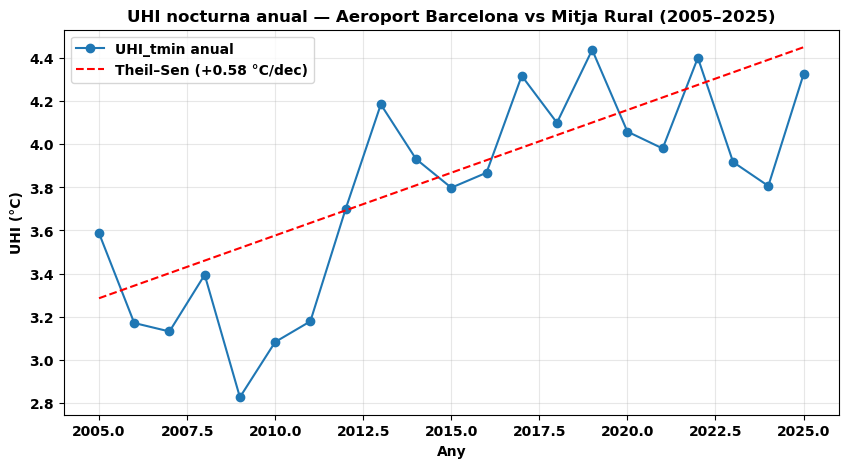

In [4]:
import pandas as pd
import numpy as np
from scipy.stats import theilslopes
import matplotlib.pyplot as plt

FILE = PROC_DIR / "uhi_input_0076_ruralMedian_2005_2025.csv"

df = pd.read_csv(FILE, parse_dates=["fecha"], index_col="fecha")
df = df[["UHI_tmin", "weak_wind"]]

# Filtrado: escenario "noweak_min150"
yearly = df["UHI_tmin"].resample("YE").agg(["mean", "count"])
yearly_valid = yearly[yearly["count"] >= 150]["mean"].dropna()

years = yearly_valid.index.year.values
values = yearly_valid.values

# Ajuste Theil–Sen
slope, intercept, lo, hi = theilslopes(values, years, 0.95)
slope_dec = slope * 10  # °C/decada

plt.figure(figsize=(10,5))
plt.plot(years, values, "o-", label="UHI_tmin anual")
plt.plot(years, intercept + slope * years, "r--", label=f"Theil–Sen (+{slope_dec:.2f} °C/dec)")

plt.title("UHI nocturna anual — Aeroport Barcelona vs Mitja Rural (2005–2025)")
plt.xlabel("Any")
plt.ylabel("UHI (°C)")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


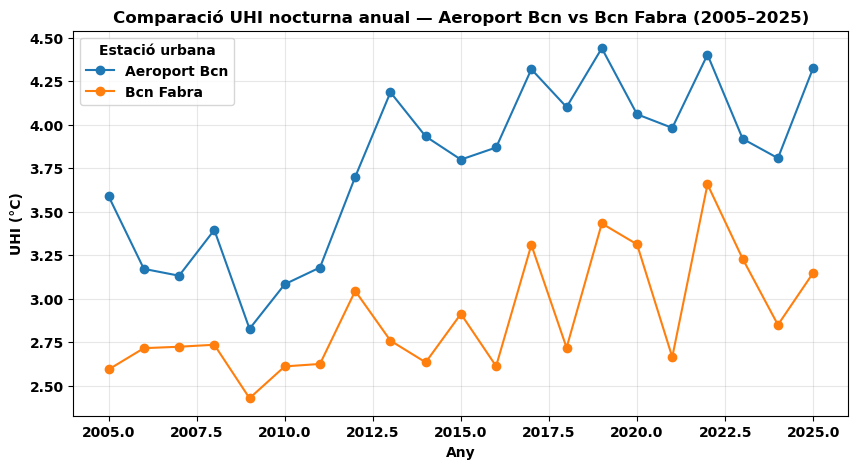

In [7]:
import matplotlib.pyplot as plt

files = {
    "Aeroport Bcn": PROC_DIR / "uhi_input_0076_ruralMedian_2005_2025.csv",
    "Bcn Fabra": PROC_DIR / "uhi_input_0200E_ruralMedian_2005_2025.csv"
}

plt.figure(figsize=(10,5))

for label, path in files.items():
    df = pd.read_csv(path, parse_dates=["fecha"], index_col="fecha")
    yearly = df["UHI_tmin"].resample("YE").agg(["mean", "count"])
    yearly = yearly[yearly["count"] >= 150]["mean"].dropna()
    plt.plot(yearly.index.year, yearly.values, "o-", label=label)

plt.title("Comparació UHI nocturna anual — Aeroport Bcn vs Bcn Fabra (2005–2025)")
plt.xlabel("Any")
plt.ylabel("UHI (°C)")
plt.grid(True, alpha=0.3)
plt.legend(title="Estació urbana")
plt.show()


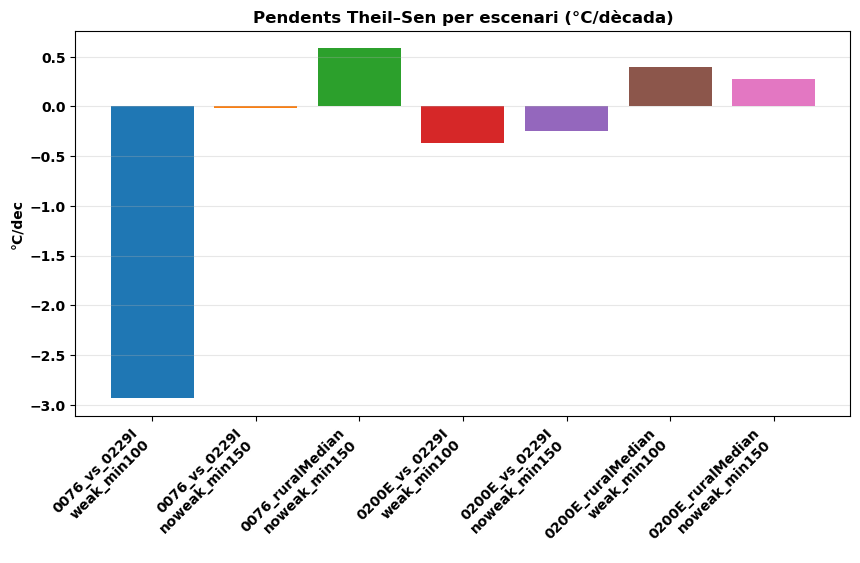

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

summary = pd.read_csv(PROC_DIR / "uhi_trends_summary_scenarios.csv")

summary_clean = summary.dropna(subset=["TheilSen_slope_degC_per_decade"])

plt.figure(figsize=(10,5))
for i, row in summary_clean.iterrows():
    plt.bar(f"{row['file']}\n{row['scenario']}", 
            row["TheilSen_slope_degC_per_decade"])

plt.title("Pendents Theil–Sen per escenari (°C/dècada)")
plt.ylabel("°C/dec")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", alpha=0.3)
plt.show()


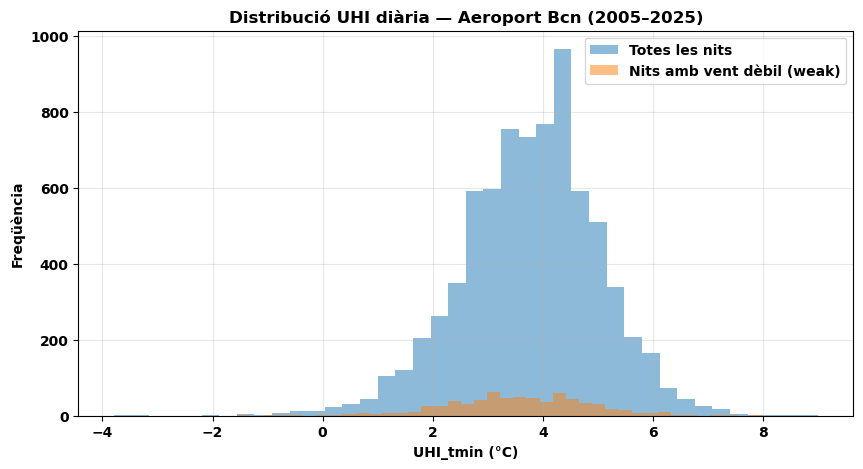

In [11]:
file = PROC_DIR / "uhi_input_0076_ruralMedian_2005_2025.csv"
df = pd.read_csv(file, parse_dates=["fecha"], index_col="fecha")

weak = df[df["weak_wind"] == True]["UHI_tmin"].dropna()
alln = df["UHI_tmin"].dropna()

plt.figure(figsize=(10,5))
plt.hist(alln, bins=40, alpha=0.5, label="Totes les nits")
plt.hist(weak, bins=40, alpha=0.5, label="Nits amb vent dèbil (weak)")

plt.title("Distribució UHI diària — Aeroport Bcn (2005–2025)")
plt.xlabel("UHI_tmin (°C)")
plt.ylabel("Freqüència")
plt.legend()
plt.grid(alpha=0.3)
plt.show()
